<a href="https://colab.research.google.com/github/ayda76/DeepLearningPytorch/blob/main/Food%20Recognition%20/FoodRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np

import torch
from torch import nn



In [10]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [11]:
#food101 101 different food categories

In [12]:
import requests
import zipfile
from pathlib import Path

#setup path to data folder
data_path=Path("data/")
image_path=data_path / "pizza_steak_sushi"

# if image folder does not exist download it and prepare it

if image_path.is_dir():
  print(f"{image_path} directory already exists. skipping download")

else:
  print(f"{image_path} does not exist. creating one!!")
  image_path.mkdir(parents=True, exist_ok=True)

data/pizza_steak_sushi directory already exists. skipping download


In [13]:
#get the data
#download it
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request= requests.get("http://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  f.write(request.content)
#unzip data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("unzipping")
  zip_ref.extractall(image_path)


unzipping


In [15]:
import os

def walk_through_dir(dir_path):
  for dirpath, dirnames , filenames in os.walk(dir_path):

    print(f" there are { len(dirnames)} directories and {len(filenames)} images in {dirpath} ")
  

In [16]:
walk_through_dir(image_path)

 there are 2 directories and 0 images in data/pizza_steak_sushi 
 there are 3 directories and 0 images in data/pizza_steak_sushi/train 
 there are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi 
 there are 0 directories and 75 images in data/pizza_steak_sushi/train/steak 
 there are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza 
 there are 3 directories and 0 images in data/pizza_steak_sushi/test 
 there are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi 
 there are 0 directories and 19 images in data/pizza_steak_sushi/test/steak 
 there are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza 


In [17]:
# set up paths 
train_dir= image_path / "train"
test_dir= image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [ ]:
# visualize image

import random 
from PIL import Image

random.seed(42)

image_path_list= list(image_path.glob("*/*/*.jpg"))
image_path_list

data/pizza_steak_sushi/test/pizza/309892.jpg
pizza
image height: 333
image width: 512


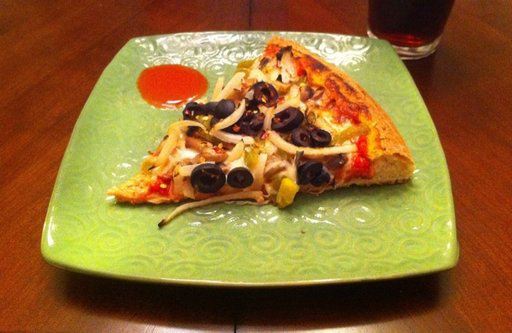

In [29]:
#pick random image path
random_image_path=random.choice(image_path_list)
print(random_image_path)

# get image class from path name (stem is end of folder like pizza)
image_class= random_image_path.parent.stem
print(image_class)

# open img

img=Image.open(random_image_path)

print(f"image height: {img.height}")
print(f"image width: {img.width}")
img

Text(0.5, 1.0, 'image class: pizza , image shape:(333, 512, 3) -> [height, width, color_channels]')

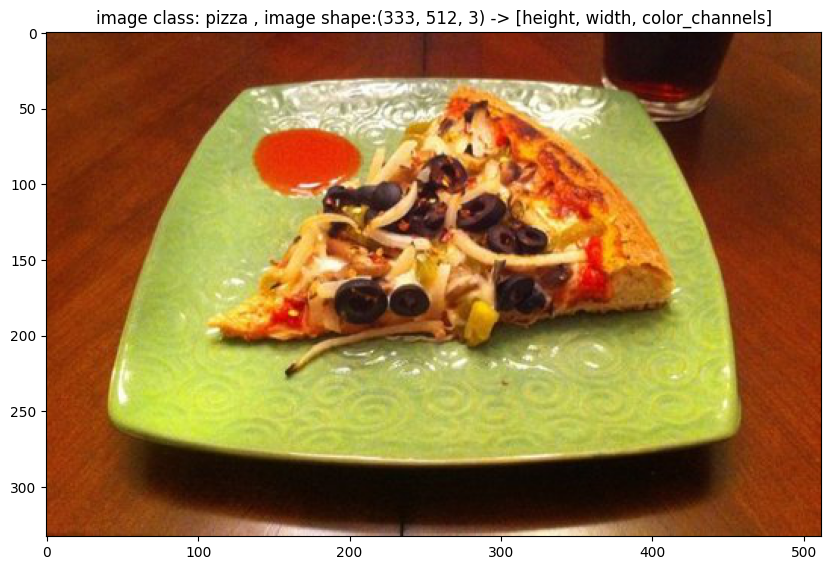

In [30]:
import matplotlib.pyplot as plt

#Turn the img to an array
img_as_array=np.asarray(img)

#plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"image class: {image_class} , image shape:{img_as_array.shape} -> [height, width, color_channels]")

In [31]:
#transforming data --> tensor

from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [33]:
data_transform= transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5), # 50 % of the time the image gets fliped in horizontal axis
    transforms.ToTensor()
])

In [34]:
data_transform(img)

tensor([[[0.4941, 0.4706, 0.4392,  ..., 0.4431, 0.4588, 0.4549],
         [0.4745, 0.4627, 0.4549,  ..., 0.4627, 0.4627, 0.4549],
         [0.4588, 0.4471, 0.4471,  ..., 0.4627, 0.4627, 0.4667],
         ...,
         [0.5765, 0.5922, 0.6000,  ..., 0.5725, 0.5961, 0.6039],
         [0.5922, 0.6000, 0.5843,  ..., 0.5725, 0.5922, 0.6078],
         [0.5725, 0.5922, 0.5843,  ..., 0.5373, 0.5608, 0.5686]],

        [[0.2471, 0.2275, 0.2118,  ..., 0.1843, 0.2039, 0.2039],
         [0.2392, 0.2275, 0.2196,  ..., 0.1922, 0.1961, 0.1961],
         [0.2353, 0.2235, 0.2039,  ..., 0.1961, 0.1961, 0.2039],
         ...,
         [0.2000, 0.2118, 0.2235,  ..., 0.2314, 0.2275, 0.2275],
         [0.2118, 0.2196, 0.2157,  ..., 0.2314, 0.2235, 0.2275],
         [0.2118, 0.2235, 0.2196,  ..., 0.2275, 0.2196, 0.2118]],

        [[0.0980, 0.0863, 0.0784,  ..., 0.0549, 0.0510, 0.0627],
         [0.0863, 0.0824, 0.0824,  ..., 0.0431, 0.0471, 0.0667],
         [0.0784, 0.0745, 0.0706,  ..., 0.0431, 0.0510, 0.

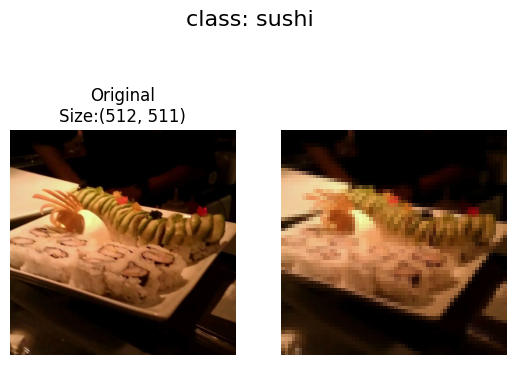

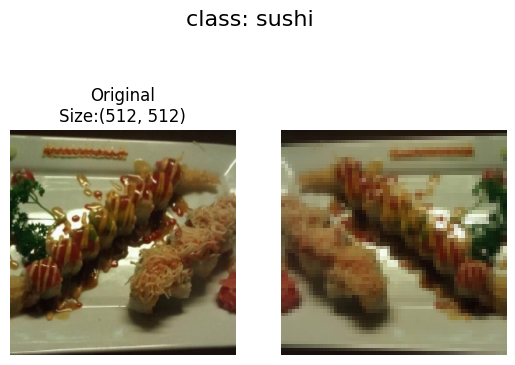

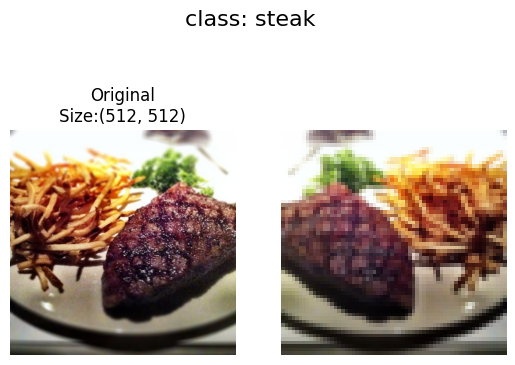

In [40]:
def plot_transformed_images(image_paths:list,transform, n=3, seed=None):
  if seed:
    random.seed(seed)

  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig , ax= plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize:{f.size}")
      ax[0].axis(False)

      #transform and plot 
      transformed_image=transform(f).permute(1,2,0)# c,h,w --> h, w, c
      ax[1].imshow(transformed_image)
      ax[1].axis("off")

      fig.suptitle(f"class: {image_path.parent.stem}", fontsize=16)


plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=42)

In [41]:
from torchvision import datasets

### use imagefolder to create datasets
train_data =datasets.ImageFolder(root=train_dir,
                                transform=data_transform,
                                target_transform=None)
test_data= datasets.ImageFolder(root=test_dir,
                                transform=data_transform)
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))